# Assignment 1 - Outlier Detection

*Due: Wednesday, 27 November, 2024 at 17:00 CET*

For the first assignment of the course Applications of Machine Learning (INFOB3APML), you will learn to use decision tree, random forest, and isolation forest to detect an outlier class. The objectives of this assignment are:
- use the supervised classification algorithms to classify outliers in real-life data sets
- perform cross validation and fine-tune the model parameters of each algorithm
- use the unsupervised outlier detection algorithms to detect outliers in real-life data sets
- calculate model performance (e.g., accuracy, recall, precision, f1)
- design experiments to compare performance of algorithms
- reflect on the difference between different models


This assignment includes three algorithms: DT, RF, and IF. The first task is to perform data exploration. In Task 2-4, you will use the three algorithms to classify outliers, respectively. In Task 5, you will compare the algorithms and evaluate their results. Please note that Task 2-4 have the following structure:
1. First, find the library (e.g., sklearn examples) and try out the algorithm by simply training the model on the training data (do not consider any parameters or cross validation just yet); 
2. Train the model with the training data by using cross validation and find the best parameter setting for the parameters of interest;
3. Report the average validation accuracy, recall, precision, and F1 scores of all validation sets;
4. Finally, test the optimal model that has the best fitting parameters on your (held-out) test data, and report the test accuracy, precision, recall, and F1. 

Note that, in Task 5, you will need all the calculated accuracy, precision, recall and F1 measures from previous tasks. Make sure you save these to a list or dictionary so you can easily evaluate and compare the results. 




## Task 1: Exploring the data set
 
 

### Data set: Bank Marketing


Import the file *dataBank-additional-full_normalised.csv* to load the preprocessed data set. "*The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed.*"


Use the column "label" as the response variable: <====== THIS SHOULD BE "class"
- The instances labeled with 1 are the "outliers", in this case the class we would like to detect accurately; 
- The instance labeled with 0 are the "inliers".


The original data description can be found via the link here below. You will also find some explanations regarding the features under the section "Attribute Information".  
https://archive.ics.uci.edu/ml/datasets/bank+marketing





In [1]:
# Import packages
import pandas as pd
import numpy as np

# Import data
data = pd.read_csv('./dataBank-additional-full_normalised_sampled.csv', sep=',')



### 1.1. Exploratory data analysis

For the data set, create 2-3 figures and tables that will help you understand the data. 


During the data exploration, you, as a team, are trying to get an impression about the data. You will create figures and/or tables that help you to get to know the data. While exploring the data, you may also consider answering the following questions, which may help you understand the data better. For example, 

- How many instances are there in each class? Are the classes imbalanced?
- How many variables are in the data? What is the data type and the distribution of each variable? 
- Are the variables informative?
- Are any pair of the potential predictor variables highly correlated?
- (Should the variables be normalized or not?)
- (Any relevant, useful preprocessing steps that may be taken?)

#### Tips: 

Make sure to at least check the data type of each variable and to understand the distribution of each variable, especially the response variable. 

Try to find out what factors seem to determine whether an instance is an outlier or not. What do you conclude?

*For creating data visualizations, you may consider using the matplot library and visit the [matplot gallery](https://matplotlib.org/stable/gallery/index.html) for inspiration (e.g., histograms for distribution, or heatmaps for feature correlation).*



In [2]:
# import packages
import matplotlib.pyplot as plt

# create an overview of the data
print(f"Described Data:\n{data.describe()}")
# print(data.columns)
X, y = data.drop(columns=["class"]), data["class"]

# # TODO: plot figure(s)
# See code blocks below

Described Data:
                age  job=housemaid  job=services    job=admin.  \
count  40188.000000   40188.000000  40188.000000  40188.000000   
mean       0.284092       0.025630      0.096073      0.252289   
std        0.127940       0.158029      0.294696      0.434332   
min        0.000000       0.000000      0.000000      0.000000   
25%        0.185185       0.000000      0.000000      0.000000   
50%        0.259259       0.000000      0.000000      0.000000   
75%        0.370370       0.000000      0.000000      1.000000   
max        1.000000       1.000000      1.000000      1.000000   

       job=blue-collar  job=technician   job=retired  job=management  \
count     40188.000000    40188.000000  40188.000000    40188.000000   
mean          0.225913        0.164129      0.041007        0.071190   
std           0.418187        0.370397      0.198309        0.257146   
min           0.000000        0.000000      0.000000        0.000000   
25%           0.000000       

In [3]:
# Outlier, inlier distribution
plt.bar(y.value_counts().index, y.value_counts())
plt.title("Outlier, inlier distribution")
plt.xlabel("Class")
plt.ylabel("Count")
plt.xticks(y.value_counts().index)
plt.show()

In [4]:
# Float and integer distribution
print(data.dtypes)
dtype_counts = data.dtypes.value_counts()
dtype_counts_type = dtype_counts.index.astype(str)
plt.bar(dtype_counts_type, dtype_counts)
plt.title("Data type distribution")


age                float64
job=housemaid        int64
job=services         int64
job=admin.           int64
job=blue-collar      int64
                    ...   
cons.price.idx     float64
cons.conf.idx      float64
euribor3m          float64
nr.employed        float64
class                int64
Length: 63, dtype: object


Text(0.5, 1.0, 'Data type distribution')

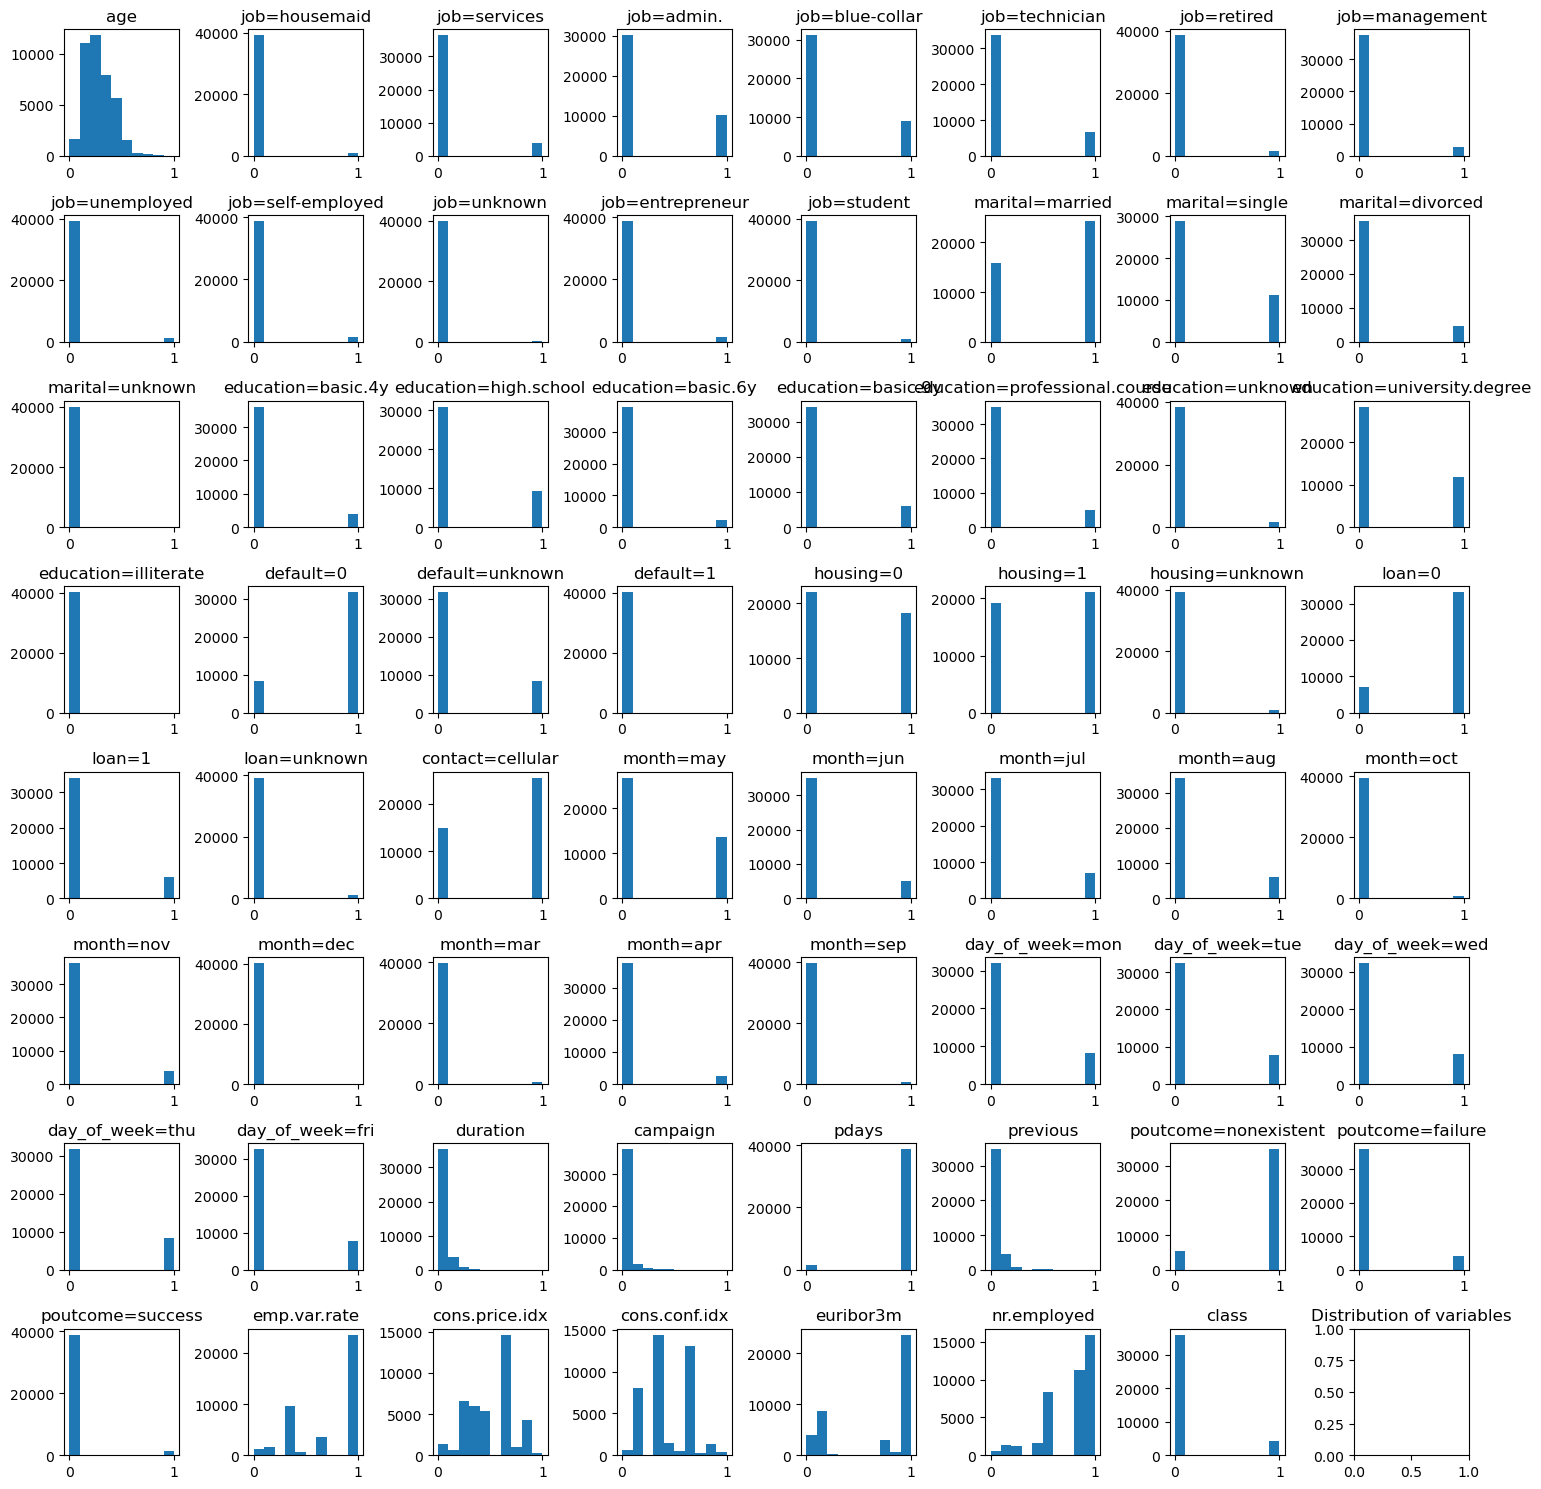

In [5]:
# Distribution of variables
fig, axes = plt.subplots(8, 8, figsize=(15, 15))
flattened_axes = axes.flatten()
for col, ax in zip(data.columns, flattened_axes):
    ax.hist(data[col])
    ax.set_title(col)
fig.tight_layout()
plt.title("Distribution of variables")
plt.show()

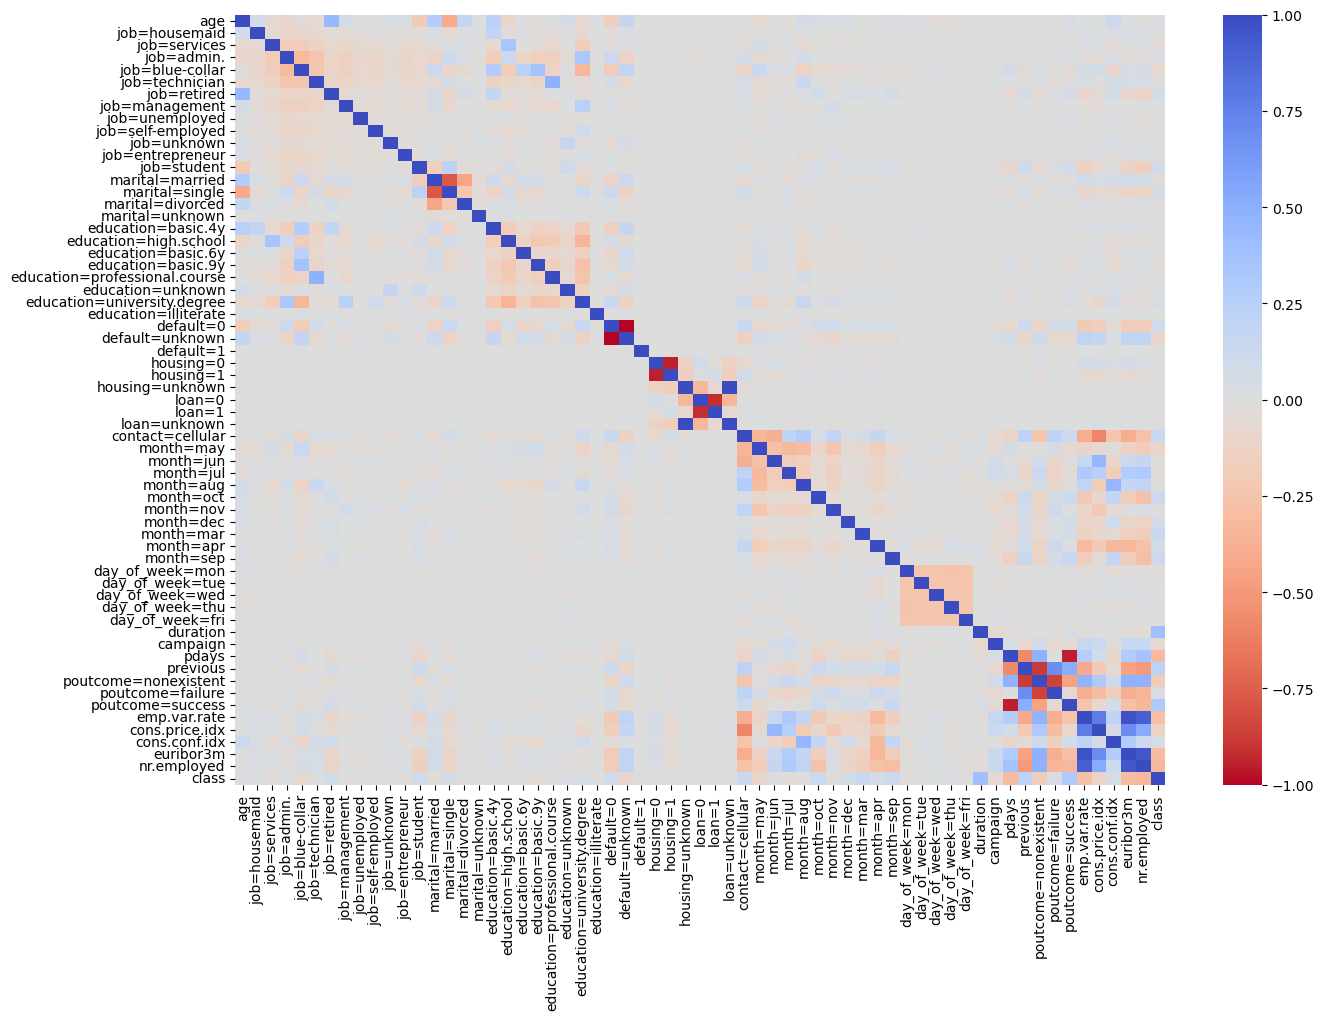

In [6]:
import seaborn as sns

plt.figure(figsize=(15,10))
sns.heatmap(data.corr(), vmin=-1, vmax=1, cmap="coolwarm_r", xticklabels=data.columns, yticklabels=data.columns)
plt.show()

In [7]:
correlations_with_class = data.corrwith(data["class"]).to_frame()
plt.figure(figsize=(15,10))
sns.heatmap(correlations_with_class, annot=True, vmin=-1, vmax=1, cmap= "coolwarm_r", yticklabels=data.columns)
plt.title("Feature correlation with class")
plt.show()

In [8]:
# This takes way too long to execute and is way too messy
#sns.pairplot(data)
#plt.show()


### 1.2. Creating Train and Test data sets

Create a training and a held-out test data set. *Later in Task 2-4, the training data will be used to perform cross-validation. The held-out test data will be used to evaluate the performance of the selected models.*

Choose the size of your test data and motivate your choice when you discuss the experiment setup in your report. 

Tips: 

*You may use the [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) class provided by sklearn*

In [9]:
# import method to make a train/test split
from sklearn.model_selection import train_test_split

# copy data
df = data.copy()

# create X and y
features = ['age', 'job=housemaid', 'job=services', 'job=admin.', 'job=blue-collar',
       'job=technician', 'job=retired', 'job=management', 'job=unemployed',
       'job=self-employed', 'job=unknown', 'job=entrepreneur', 'job=student',
       'marital=married', 'marital=single', 'marital=divorced',
       'marital=unknown', 'education=basic.4y', 'education=high.school',
       'education=basic.6y', 'education=basic.9y',
       'education=professional.course', 'education=unknown',
       'education=university.degree', 'education=illiterate', 'default=0',
       'default=unknown', 'default=1', 'housing=0', 'housing=1',
       'housing=unknown', 'loan=0', 'loan=1', 'loan=unknown',
       'contact=cellular', 'month=may', 'month=jun', 'month=jul', 'month=aug',
       'month=oct', 'month=nov', 'month=dec', 'month=mar', 'month=apr',
       'month=sep', 'day_of_week=mon', 'day_of_week=tue', 'day_of_week=wed',
       'day_of_week=thu', 'day_of_week=fri', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome=nonexistent', 'poutcome=failure',
       'poutcome=success', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
       'euribor3m', 'nr.employed']
X = df[features]
y = df[['class']]



# TODO: create training data and held-out test data
X_, X_heldout, y_, y_heldout = train_test_split(X, y, test_size=0.2)



## Task 2: Decision Trees 
### - Outlier Detection as a Supervised Classification

### 2.1 Training a Decision Tree

Use the basic [Decision Tree](http://scikit-learn.org/stable/modules/tree.html#tree) library in sklearn to learn a decision tree model by fitting the full training data.

Show/plot the tree diagram and also plot the feature importances. 
What do you observe?


#### Tips:

To show the tree diagram, you may use the graphviz library or use the plot_tree function, see https://scikit-learn.org/stable/modules/tree.html




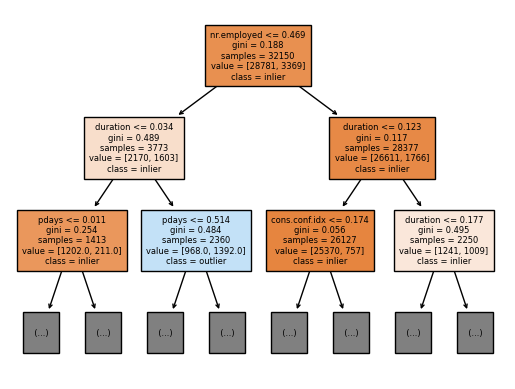

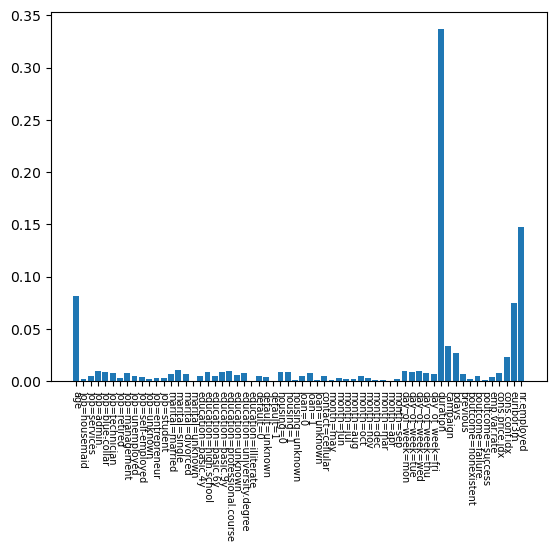

In [10]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

# TODO: learn a decision tree using default parameters
clf = DecisionTreeClassifier()
clf.fit(X_, y_)

# TODO: plot the tree
tree.plot_tree(clf, feature_names=features, class_names=['inlier', 'outlier'], filled=True, max_depth=2, fontsize=6)
plt.show()

# TODO: plot the feature importances
plt.bar(features, clf.feature_importances_)
plt.xticks(rotation=-90, fontsize=7)
plt.show()

### 2.2 Confusion Matrix and Accuracy

Compute the *confusion matrix* and *accuracy* of the tree using the held-out data set. Moreover, also compute the *recall*, *precision*, and *F1-score* of the tree. 


For this part, you can either implement your own functions or use the following scikit-learn libraries.  
- [confusion matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html#sklearn.metrics.confusion_matrix)
- [accuracy score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html)
- [recall](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html#sklearn.metrics.recall_score)
- [precision](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html#sklearn.metrics.precision_score)
- [f1 score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html#sklearn.metrics.f1_score)
- [classification report](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html#sklearn.metrics.classification_report)


Reflect on the performance of the model and be aware of the difference between *accuracy* and *F1-score*. How good is this decision tree model for outlier detection?

In [11]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score


# use the model to make predictions for the test data set
y_pred = clf.predict(X_heldout)

# TODO: compute accuracy, recall, precision, and f1 score
print('Accuracy:', accuracy_score(y_heldout, y_pred))
print('Recall:', recall_score(y_heldout, y_pred))
print('Precision:', precision_score(y_heldout, y_pred))
print('F1:', f1_score(y_heldout, y_pred))
print("\n")
print('Confusion matrix:\n', confusion_matrix(y_heldout, y_pred))
print("\n")
print('Classification report:\n', classification_report(y_heldout, y_pred))



Accuracy: 0.8938790743966161
Recall: 0.49286640726329445
Precision: 0.4513064133016627
F1: 0.47117172969621823


Confusion matrix:
 [[6805  462]
 [ 391  380]]


Classification report:
               precision    recall  f1-score   support

           0       0.95      0.94      0.94      7267
           1       0.45      0.49      0.47       771

    accuracy                           0.89      8038
   macro avg       0.70      0.71      0.71      8038
weighted avg       0.90      0.89      0.90      8038



### 2.3 Features to Tree  (optional)

Use the training data to re-fit a new decision tree with the parameter max_depth set to 4. Show the tree diagram and also plot the feature importances. 

Recalculate the performance of this simpler model. 

What do you observe?


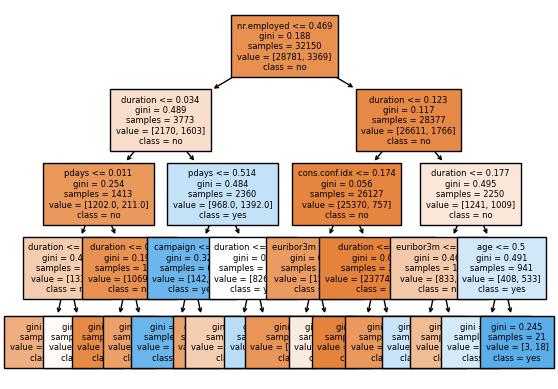

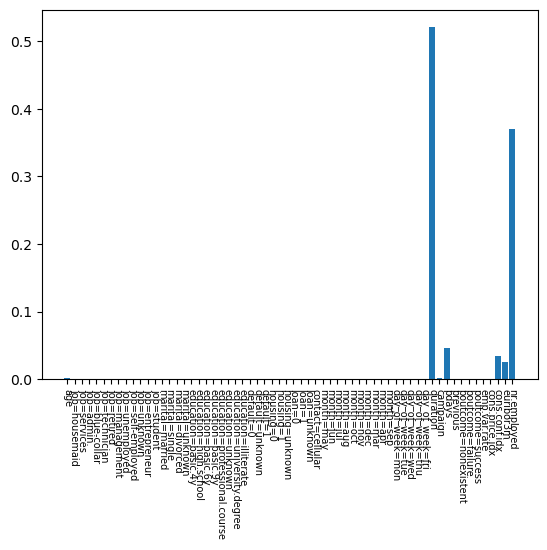

Accuracy: 0.9156506593680019
Recall: 0.4889753566796368
Precision: 0.5703479576399395
F1: 0.526536312849162
Confusion matrix:
 [[6983  284]
 [ 394  377]]
Classification report:
               precision    recall  f1-score   support

           0       0.95      0.96      0.95      7267
           1       0.57      0.49      0.53       771

    accuracy                           0.92      8038
   macro avg       0.76      0.72      0.74      8038
weighted avg       0.91      0.92      0.91      8038



In [12]:
# TODO: learn a decision tree with maximal depth 4
clf = DecisionTreeClassifier(max_depth=4)
clf.fit(X_, y_)


# TODO: plot the tree
tree.plot_tree(clf, feature_names=features, class_names=['no', 'yes'], filled=True, fontsize=6)
plt.show()

plt.bar(features, clf.feature_importances_)
plt.xticks(rotation=-90, fontsize=7)
plt.show()

# use the model to make predictions for the test data set
y_pred = clf.predict(X_heldout)


# TODO: compute accuracy, recall, precision, and f1 score
print('Accuracy:', accuracy_score(y_heldout, y_pred))
print('Recall:', recall_score(y_heldout, y_pred))
print('Precision:', precision_score(y_heldout, y_pred))
print('F1:', f1_score(y_heldout, y_pred))
print('Confusion matrix:\n', confusion_matrix(y_heldout, y_pred))
print('Classification report:\n', classification_report(y_heldout, y_pred))



### 2.4 Cross validation (optional)

The code example shown here below uses the [kfold](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html#sklearn.model_selection.KFold) method to implement 5-fold cross-validation. Moreover, it uses the cross validation to explore how the max_depth influences the model performance. It keeps track of the validation accuracy scores and F1-scores across the 5 folds. 


Now, change the code to also compute the recall and precision. 


In [13]:
from sklearn.model_selection import KFold

def kfold_dtree_maxdepth():
    # create 5-fold cross-validation
    nk = 5
    kf = KFold(n_splits=nk, random_state=0, shuffle=True)

    # Search the parameter among the following
    C = np.arange(2, 10,)


    # init acc
    acc = np.zeros((nk , len(C)))
    train_acc = np.zeros((nk , len(C)))
    # init f1
    f1 = np.zeros((nk , len(C)))
    # init recall
    recall = np.zeros((nk , len(C)))
    # init precision
    precision = np.zeros((nk , len(C)))

    i = 0
    for train_index , val_index in kf.split(X_):
        X_t, X_val = X_.iloc[train_index], X_.iloc[val_index]
        y_t, y_val = y_.iloc[train_index], y_.iloc[val_index]
        j = 0
        for c in C:
            dt = tree.DecisionTreeClassifier(min_samples_leaf = 1, max_depth = c)
            dt.fit(X_t, y_t)
            yhat = dt.predict(X_val)
            train_pred = dt.predict(X_t)
            acc[i][j] = accuracy_score(y_val, yhat)
            train_acc[i][j] = accuracy_score(y_t, train_pred)
            f1[i][j] = f1_score(y_val , yhat)
            recall[i][j] = recall_score(y_val, yhat)
            precision[i][j] = precision_score(y_val, yhat)
            j = j + 1
        i = i + 1
    
    acc_mean = np.mean(acc, axis=0)
    f1_mean = np.mean(f1, axis=0)
    recall_mean = np.mean(recall, axis=0)
    precision_mean = np.mean(precision, axis=0)
    train_acc_mean = np.mean(train_acc, axis=0)
    return acc_mean, f1_mean, recall_mean, precision_mean, train_acc_mean, C



In [14]:
acc, f1, recall, precision, train_acc, C = kfold_dtree_maxdepth()

print(f'Mean accuracy: {acc}')
print(f'Selected model index: {np.argmax(acc)}')
print("\n")

print(f'Mean F1: {f1}')
print(f'Selected model index: {np.argmax(f1)}')
print("\n")

print(f"Mean Recall: {recall}")
print(f'Selected model index: {np.argmax(recall)}')
print("\n")

print(f"Mean Precision: {precision}")
print(f'Selected model index: {np.argmax(precision)}')

Mean accuracy: [0.90805599 0.91048212 0.91757387 0.91884914 0.9177605  0.91657854
 0.91430793 0.91166407]
Selected model index: 3


Mean F1: [0.47856353 0.53992241 0.56954174 0.58452929 0.5557462  0.56474772
 0.5682802  0.54779178]
Selected model index: 3


Mean Recall: [0.40327855 0.5109747  0.52129831 0.54509038 0.49367203 0.51677455
 0.53810632 0.51100886]
Selected model index: 3


Mean Precision: [0.58981693 0.59102606 0.62869649 0.63068566 0.642935   0.62373414
 0.6031812  0.59078845]
Selected model index: 4


### 2.5 Tree Tuning



The built-in decision tree algorithm you are using has several parameters which you can tune (e.g., *max_depth* and *min_samples_leaf*). Use 5-fold cross-validation (e.g., reuse the code of task 2.4 and adapt the code for two parameters), show how the choice of these parameters affects performance. 


#### Tips: 
Make a decision on the range of values that you would try for the two parameters and discuss your choice in the experiment setup section.

Here is a guide that helps you to build the experiment.
First, reuse the code of task 2.4 and show how max_depth affects train and **validation accuracy**. On a single axis, plot train and **validation accuracy** as a function of max_depth. Use a red line to show validation accuracy and a blue line to show train accuracy. (Do not use your (held-out) **test data** yet). 

Second, show how validation accuracy relates to both max_depth and min_samples_leaf. Specifically, create a 3-D plot where the x-axis is max_depth, the y-axis is min_samples_leaf, and the z-axis shows accuracy. What combination of max_depth and min-samples_leaf achieves the highest F1 score? How sensitive are the results to these two parameters? 

Finally, select the best-performing decision tree (i.e., the one that achieved the highest cross-validated performance) and report the performance of the fitted model on the held-out test data -- how does it compare to the cross-validated F1 score?


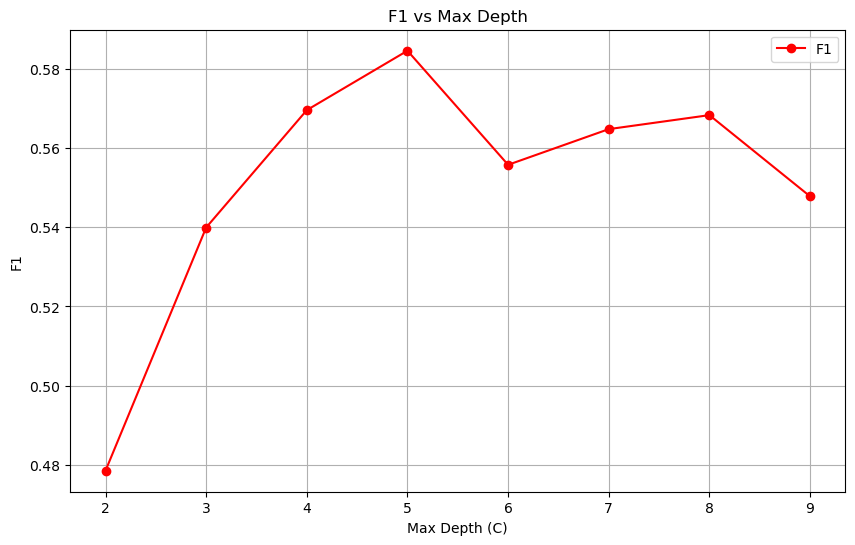

In [15]:
plt.figure(figsize=(10, 6))
plt.plot(C, acc, label='Validation Accuracy', color='red', marker='o')
plt.plot(C, train_acc, label='Train Accuracy', color='blue', marker='o')
plt.xlabel('Max Depth (C)')
plt.ylabel('Accuracy')
plt.title('Train and Validation Accuracy vs Max Depth')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(C, f1, label='F1', color='red', marker='o')
plt.xlabel('Max Depth (C)')
plt.ylabel('F1')
plt.title('F1 vs Max Depth')
plt.legend()
plt.grid(True)
plt.show()

In [16]:
# TODO: set the search space of the parameters
max_depth_range = np.arange(2, 9, 1)
min_samples_leaf_range = np.arange(2, 100,10)

def kfold_dtree_maxdepth_minsamplesleaf():
    # TODO: create 5-fold cross-validation
    nk = 5
    kf = KFold(n_splits=nk, random_state=0, shuffle=True)

    # TODO: learn an optimal decision tree model
    # init acc
    acc = np.zeros((nk , len(max_depth_range), len(min_samples_leaf_range)))
    train_acc = np.zeros((nk , len(max_depth_range), len(min_samples_leaf_range)))
    # init f1
    f1 = np.zeros((nk ,len(max_depth_range), len(min_samples_leaf_range)))
    # init recall
    recall = np.zeros((nk , len(max_depth_range), len(min_samples_leaf_range)))
    # init precision
    precision = np.zeros((nk , len(max_depth_range), len(min_samples_leaf_range)))

    trees = np.zeros((nk , len(max_depth_range), len(min_samples_leaf_range)), dtype = DecisionTreeClassifier)

    i = 0
    for train_index , val_index in kf.split(X_):
        X_t, X_val = X_.iloc[train_index], X_.iloc[val_index]
        y_t, y_val = y_.iloc[train_index], y_.iloc[val_index]
        j = 0
        for max_depth in max_depth_range:
            k = 0
            for min_samples_leaf in min_samples_leaf_range:

                dt = tree.DecisionTreeClassifier(min_samples_leaf = min_samples_leaf, max_depth = max_depth)
                dt.fit(X_t, y_t)

                yhat = dt.predict(X_val)
                train_pred = dt.predict(X_t)

                acc[i,j,k] = accuracy_score(y_val, yhat)
                train_acc[i,j,k] = accuracy_score(y_t, train_pred)
                f1[i,j,k] = f1_score(y_val , yhat)
                recall[i,j,k] = recall_score(y_val, yhat)
                precision[i,j,k] = precision_score(y_val, yhat)
                trees[i,j,k] = dt
                k += 1
            j = j + 1
        i = i + 1
    
    acc_mean = np.mean(acc, axis=0)
    f1_mean = np.mean(f1, axis=0)
    recall_mean = np.mean(recall, axis=0)
    precision_mean = np.mean(precision, axis=0)
    train_acc_mean = np.mean(train_acc, axis=0)
    return acc_mean, f1_mean, recall_mean, precision_mean, train_acc_mean

In [17]:
acc, f1, recall, precision, train_acc = kfold_dtree_maxdepth_minsamplesleaf()
    
print(f'Mean accuracy: {acc}')
print(f'Selected model index: {np.argmax(acc)}')
print("\n")

print(f'Mean F1: {f1}')
print(f'Selected model index: {np.argmax(f1)}')
print("\n")

print(f"Mean Recall: {recall}")
print(f'Selected model index: {np.argmax(recall)}')
print("\n")

print(f"Mean Precision: {precision}")
print(f'Selected model index: {np.argmax(precision)}')



Mean accuracy: [[0.90805599 0.90805599 0.90805599 0.90805599 0.90805599 0.90805599
  0.90805599 0.90805599 0.90805599 0.90805599]
 [0.91048212 0.91048212 0.91048212 0.91048212 0.91048212 0.91048212
  0.91048212 0.91048212 0.91048212 0.91048212]
 [0.91757387 0.91757387 0.91763608 0.91763608 0.91763608 0.91766719
  0.91769829 0.91754277 0.91769829 0.91751166]
 [0.91884914 0.91872473 0.9192224  0.91900467 0.91804044 0.91794712
  0.91819596 0.91819596 0.91757387 0.91738725]
 [0.91782271 0.91813375 0.91881804 0.91813375 0.91713841 0.9170451
  0.91757387 0.91735614 0.91760498 0.917014  ]
 [0.91645412 0.91695179 0.91822706 0.9177916  0.91723173 0.91785381
  0.91847589 0.91825816 0.91807154 0.91732504]
 [0.91440124 0.91458787 0.91688958 0.9170451  0.9162675  0.91735614
  0.91825816 0.9177916  0.91800933 0.91716952]]
Selected model index: 32


Mean F1: [[0.47856353 0.47856353 0.47856353 0.47856353 0.47856353 0.47856353
  0.47856353 0.47856353 0.47856353 0.47856353]
 [0.53992241 0.53992241 0.539

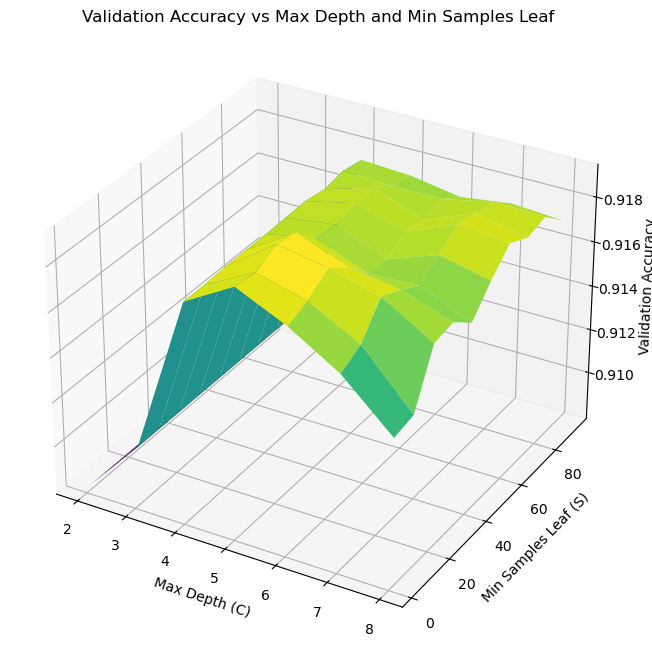

Best f1 training score: 0.5845292875760688
Best f1 testing score: 0.548431105047749
Best f1 max_depth: 5
Best f1 min_samples-leaf: 2


Best acc training score: 0.919222395023328
Best acc testing score: 0.9176412042796716


Best precision training score: 0.6479055281536141
Best precision testing score: 0.5784172661870504


Best recall training score: 0.5450903830060433
Best recall testing score: 0.5214007782101168




In [18]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

# TODO: create 2D (or 3D) plot that shows how the selected parameters affect the performance. 

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
X, Y = np.meshgrid(max_depth_range, min_samples_leaf_range)
ax.plot_surface(X, Y, acc.T, cmap=cm.viridis)
ax.set_xlabel('Max Depth (C)')
ax.set_ylabel('Min Samples Leaf (S)')
ax.set_zlabel('Validation Accuracy')
plt.title('Validation Accuracy vs Max Depth and Min Samples Leaf')
plt.show()


fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
X, Y = np.meshgrid(max_depth_range, min_samples_leaf_range)
ax.plot_surface(X, Y, f1.T, cmap=cm.viridis)
ax.set_xlabel('Max Depth (C)')
ax.set_ylabel('Min Samples Leaf (S)')
ax.set_zlabel('F1')
plt.title('F1 vs Max Depth and Min Samples Leaf')
plt.show()

# TODO: compute the performance of the model on your held-out test data
best_model_ind = np.argmax(f1)
best_2d_ind = np.unravel_index(best_model_ind, f1.shape)

best_max_depth = max_depth_range[best_2d_ind[0]]
best_min_samples_leaf = min_samples_leaf_range[best_2d_ind[1]]

best_dt = tree.DecisionTreeClassifier(min_samples_leaf = best_min_samples_leaf, max_depth = best_max_depth)
best_dt.fit(X_, y_)
y_pred = best_dt.predict(X_heldout)

best_train_f1 = np.max(f1)
best_train_recall = np.max(recall)
best_train_prec = np.max(precision)
best_train_acc = np.max(acc)

f1_test = f1_score(y_heldout, y_pred)
acc_test = accuracy_score(y_heldout, y_pred)
prec_test = precision_score(y_heldout, y_pred)
recall_test = recall_score(y_heldout, y_pred)

print(f"Best f1 training score: {best_train_f1}")
print(f"Best f1 testing score: {f1_test}")
print(f"Best f1 max_depth: {best_max_depth}")
print(f"Best f1 min_samples-leaf: {best_min_samples_leaf}")
print("\n")

print(f"Best acc training score: {best_train_acc}")
print(f"Best acc testing score: {acc_test}")
print("\n")

print(f"Best precision training score: {best_train_prec}")
print(f"Best precision testing score: {prec_test}")
print("\n")

print(f"Best recall training score: {best_train_recall}")
print(f"Best recall testing score: {recall_test}")
print("\n")


## Task 3. Random Forest
### - Outlier Detection as a Supervised Classification

Now use a [Random Forest](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) to predict the labels for the data set. 

i) use the default values for the parameters to get a RF model running. 

ii) use 5-fold cross-validation to determine a possibly better choice for the parameter *n_estimators* and *max_features*
    
iii) select the best-performing decision tree (i.e., the one that achieved the highest cross-validated performance) and report the performance of the fitted model on the held-out test data ?

In the report, reflect on how does the test performance of RF compare to the decision tree performance? 
 



In [ ]:
from sklearn.ensemble import RandomForestClassifier

# TODO: set the search space of the parameters
n_estimators = [10, 50, 100, 200]
max_features = ['sqrt', 'log2', None]

def random_forest():
    # TODO: create 5-fold cross-validation
    nk = 5
    kf = KFold(n_splits=nk, random_state=0, shuffle=True)

    # init acc
    acc = np.zeros((nk , len(n_estimators), len(max_features)))
    train_acc = np.zeros((nk , len(n_estimators), len(max_features)))
    # init f1
    f1 = np.zeros((nk , len(n_estimators), len(max_features)))
    # init recall
    recall = np.zeros((nk , len(n_estimators), len(max_features)))
    # init precision
    precision = np.zeros((nk , len(n_estimators), len(max_features)))

    trees = np.zeros((nk , len(n_estimators), len(max_features)), dtype = RandomForestClassifier)

    i = 0
    for train_index , val_index in kf.split(X_):
        X_t, X_val = X_.iloc[train_index], X_.iloc[val_index]
        y_t, y_val = y_.iloc[train_index], y_.iloc[val_index]
        
        j = 0
        
        for est in n_estimators:
            k = 0
            for feat in max_features:
                clf = RandomForestClassifier(n_estimators=est, max_features=feat) 
                clf.fit(X_t, y_t.to_numpy().flatten())
                train_pred = clf.predict(X_t)
                yhat = clf.predict(X_val)
                acc[i,j,k] = accuracy_score(y_val, yhat)
                train_acc[i,j,k] = accuracy_score(y_t, train_pred)
                f1[i,j,k] = f1_score(y_val , yhat)
                recall[i,j,k] = recall_score(y_val, yhat)
                precision[i,j,k] = precision_score(y_val, yhat)
                trees[i, j, k] = clf
                k += 1
            j += 1
        i += 1
        
    acc_mean = np.mean(acc, axis=0)
    f1_mean = np.mean(f1, axis=0)
    recall_mean = np.mean(recall, axis=0)
    precision_mean = np.mean(precision, axis=0)
    train_acc_mean = np.mean(train_acc, axis=0)
    return acc_mean, f1_mean, recall_mean, precision_mean, train_acc_mean
    
    



In [20]:
acc, f1, recall, precision, train_acc = random_forest()

print(f'Mean accuracy: {acc}')
print(f'Selected model index: {np.argmax(acc)}')
print("\n")

print(f'Mean F1: {f1}')
print(f'Selected model index: {np.argmax(f1)}')
print("\n")

print(f"Mean Recall: {recall}")
print(f'Selected model index: {np.argmax(recall)}')
print("\n")

print(f"Mean Precision: {precision}")
print(f'Selected model index: {np.argmax(precision)}')
print("\n")

# TODO: learn an optimal random forest model
best_train_f1 = np.max(f1)
best_train_recall = np.max(recall)
best_train_prec = np.max(precision)
best_train_acc = np.max(acc)

best_model_ind = np.argmax(f1)
best_2d_ind = np.unravel_index(best_model_ind, f1.shape)

best_n_estimators = n_estimators[best_2d_ind[0]]
best_max_features = max_features[best_2d_ind[1]]

best_rf = RandomForestClassifier(n_estimators=best_n_estimators, max_features=best_max_features)


# TODO: compute the performance of the model on your held-out test data
best_rf.fit(X_, y_.to_numpy().flatten())
y_pred = best_rf.predict(X_heldout)
f1_test = f1_score(y_heldout, y_pred)
acc_test = accuracy_score(y_heldout, y_pred)
prec_test = precision_score(y_heldout, y_pred)
recall_test = recall_score(y_heldout, y_pred)

print(f"Best f1 training score: {best_train_f1}")
print(f"Best f1 testing score: {f1_test}")
print(f"Best f1 n_estimators: {best_n_estimators}")
print(f"Best f1 max_features: {best_max_features}")
print("\n")

print(f"Best acc training score: {best_train_acc}")
print(f"Best acc testing score: {acc_test}")
print("\n")

print(f"Best precision training score: {best_train_prec}")
print(f"Best precision testing score: {prec_test}")
print("\n")

print(f"Best recall training score: {best_train_recall}")
print(f"Best recall testing score: {recall_test}")
print("\n")

Mean accuracy: [[0.91287714 0.91082426 0.9126283 ]
 [0.91673406 0.91421462 0.91741835]
 [0.91623639 0.91548989 0.918507  ]
 [0.91654743 0.91533437 0.91748056]]
Selected model index: 8


Mean F1: [[0.48198676 0.44055278 0.52467245]
 [0.52246121 0.47639061 0.56571344]
 [0.51460067 0.48656794 0.57985256]
 [0.51572827 0.48694702 0.57117236]]
Selected model index: 8


Mean Recall: [[0.38748792 0.3353241  0.46070092]
 [0.43528704 0.3729301  0.51435202]
 [0.42468228 0.38233018 0.53755636]
 [0.42463657 0.38383848 0.5251672 ]]
Selected model index: 8


Mean Precision: [[0.6392716  0.64369537 0.60964318]
 [0.65477391 0.66127782 0.6295757 ]
 [0.65454584 0.67026812 0.63026944]
 [0.6575474  0.66746786 0.62665212]]
Selected model index: 7


Best f1 training score: 0.5798525627872363
Best f1 testing score: 0.526168876482903
Best f1 n_estimators: 100
Best f1 max_features: None


Best acc training score: 0.9185069984447901
Best acc testing score: 0.9155262503110226


Best precision training score: 0.67

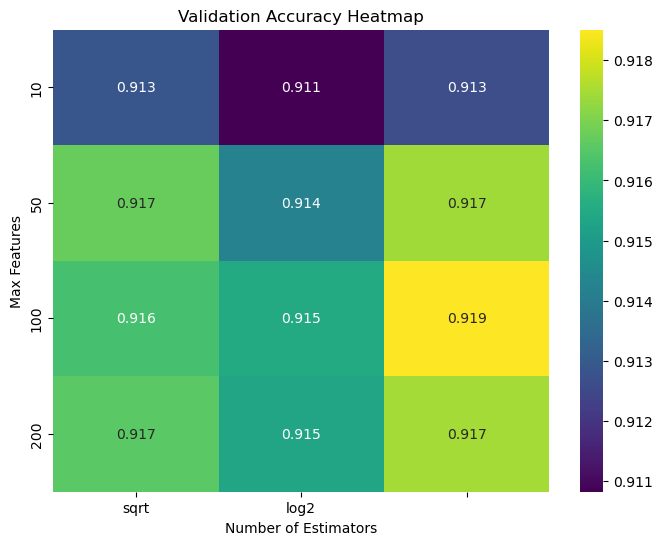

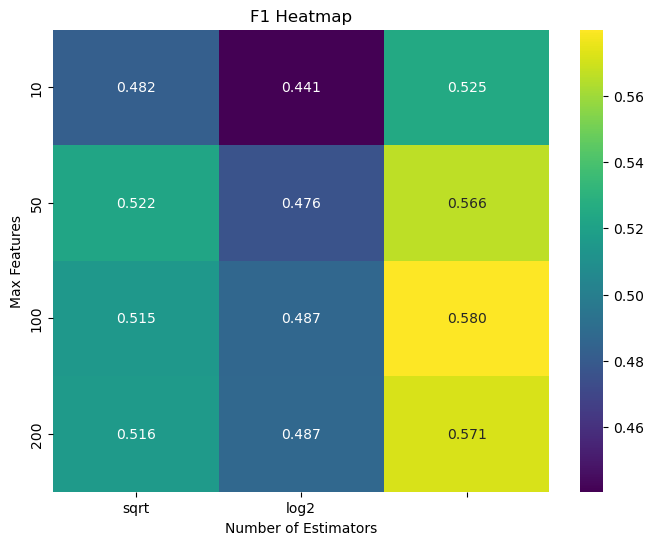

In [21]:
# Convert to DataFrame
acc_df = pd.DataFrame(acc, index=n_estimators, columns=max_features)
f1_df = pd.DataFrame(f1, index=n_estimators, columns=max_features)

# Plot heatmap Acc
plt.figure(figsize=(8, 6))
sns.heatmap(acc_df, annot=True, cmap="viridis", fmt=".3f")
plt.title("Validation Accuracy Heatmap")
plt.xlabel("Number of Estimators")
plt.ylabel("Max Features")
plt.show()

# Plot heatmap F1
plt.figure(figsize=(8, 6))
sns.heatmap(f1_df, annot=True, cmap="viridis", fmt=".3f")
plt.title("F1 Heatmap")
plt.xlabel("Number of Estimators")
plt.ylabel("Max Features")
plt.show()



## Task 4. Isolation Forest

### 4.1 Apply Isolation Forest
### - Outlier Detection as an Unsupervised Classification

Use the [Isolation Forest Classifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.IsolationForest.html) to detect potential outliers in the data set. 

Select two parameters that you would like to investigate (for example, contamination, max_depth, n_estimators, max_samples). For each configuration: 

i) Apply Isolation Forest on the full data set (without using the labels Y)


ii) Use the labels to compute the accuracy, recall, precision, and F1-score on the full data set (using the labels). 


Compare the performance of Isolation Forest of different configurations. 


#### Tips:

- Note that the fit(X) function of the Isolation Forest does not use the labels. 


- **Look carefully at the values that an Isolation Forest classifier returns. Which value represents the outlier class? Be aware that you need to implement a mapping function f(x) that remaps -1 to 1 and 1 to 0, in order to transform the predictions such that the semantics are consistant with the previous classification algorithms.**


- Create 2D (or 3D) plots to visualize your results



In [27]:
from sklearn.ensemble import IsolationForest


X = df[features]
y = df[['class']]



#Remapping funtion
def remap(X):
    return [1 if x == -1 else 0 for x in X]

def remap(X):
    res = []
    for x in X:
        if x == -1:
            res.append(1)
        elif x == 1:
            res.append(0)
        else:
            print(f"Something went terribly wrong!!! x = {x}")
    return res

# TODO: set the search space of the parameters

n_estimators = [10, 50, 100, 200]
max_samples = [100, 250, 500, 750, 1000, 2000, 4000]

# init acc
acc = np.zeros((len(n_estimators), len(max_samples)))
# init f1
f1 = np.zeros((len(n_estimators), len(max_samples)))
# init recall
recall = np.zeros((len(n_estimators), len(max_samples)))
# init precision
precision = np.zeros((len(n_estimators), len(max_samples)))

# TODO: apply the configured Isolation Forest model on the test set. 

j = 0
for est in n_estimators:
    k = 0
    for m_samp in max_samples:
        clf = IsolationForest(n_estimators= est, max_samples= m_samp)
        clf.fit(X)
        yhat = clf.predict(X)
        yhatremap = remap(yhat)

        acc[j,k] = accuracy_score(y, yhatremap)
        f1[j,k] = f1_score(y , yhatremap)
        recall[j,k] = recall_score(y, yhatremap)
        precision[j,k] = precision_score(y, yhatremap)
        k += 1
    j += 1
 

#TODO: compute the performance of the model
print('Accuracy: ' + str(acc))
print('Selected model index: ' + str(np.argmax(acc)))

print('F1: ' + str(f1))
print('Selected model index: ' + str(np.argmax(f1 )))

print(f"Recall: {recall}")
print('Selected model index: ' + str(np.argmax(recall )))

print(f"|Precision: {precision}")
print('Selected model index: ' + str(np.argmax(precision )))


# TODO: return the optimal Isolation Forest model
best_f1 = np.max(f1)
best_recall = np.max(recall)
best_prec = np.max(precision)
best_acc = np.max(acc)

best_model_ind = np.argmax(f1)
best_2d_ind = np.unravel_index(best_model_ind, f1.shape)

best_n_estimators = n_estimators[best_2d_ind[0]]
best_max_samples = max_samples[best_2d_ind[1]]

print(f"Best f1 score: {best_f1}")
print(f"Best f1 n_estimators: {best_n_estimators}")
print(f"Best f1 max_samples: {best_max_samples}")
print("\n")

print(f"Best acc score: {best_acc}")
print("\n")

print(f"Best precision score: {best_prec}")
print("\n")

print(f"Best recall score: {best_recall}")
print("\n")



Accuracy: [[0.81633821 0.83878272 0.81419827 0.84958196 0.83845924 0.84522743
  0.86125212]
 [0.84472977 0.86281975 0.88046183 0.86909028 0.88165622 0.87809794
  0.88170598]
 [0.83773763 0.86851797 0.88143227 0.88095949 0.87675426 0.88170598
  0.88451777]
 [0.85376232 0.87003583 0.88088484 0.87747586 0.87730168 0.88511496
  0.88795163]]
Selected model index: 27
F1: [[0.31790038 0.25945822 0.25988701 0.30589046 0.2405241  0.23643506
  0.24115406]
 [0.29475588 0.31455924 0.32622721 0.28294943 0.26740604 0.28741818
  0.26134245]
 [0.302343   0.30910042 0.31012017 0.29915031 0.30698195 0.28056901
  0.27676484]
 [0.30654867 0.3240585  0.29881353 0.31305804 0.27303553 0.28672949
  0.25900938]]
Selected model index: 9
Recall: [[0.41545894 0.27415459 0.31666667 0.32173913 0.24830918 0.2326087
  0.21400966]
 [0.31497585 0.30555556 0.28091787 0.25072464 0.20966184 0.23864734
  0.2031401 ]
 [0.34130435 0.28550725 0.25869565 0.24661836 0.26497585 0.22391304
  0.21449275]
 [0.31376812 0.30241546 0.

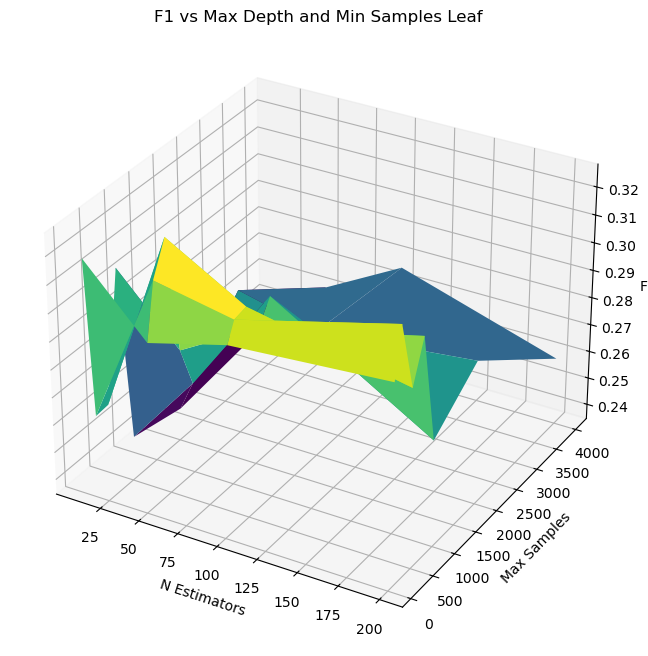

In [28]:
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
X, Y = np.meshgrid(n_estimators, max_samples)
ax.plot_surface(X, Y, acc.T, cmap=cm.viridis)
ax.set_xlabel('N Estimators')
ax.set_ylabel('Max Samples')
ax.set_zlabel('Validation Accuracy')
plt.title('Validation Accuracy vs N Estimators and Max Samples')
plt.show()

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
X, Y = np.meshgrid(n_estimators, max_samples)
ax.plot_surface(X, Y, f1.T, cmap=cm.viridis)
ax.set_xlabel('N Estimators')
ax.set_ylabel('Max Samples')
ax.set_zlabel('F1')
plt.title('F1 vs Max Depth and Min Samples Leaf')
plt.show()


### 4.2 Outlier Detection - Analyze Outliers

Taking the best performing Isolation Forest model from Task 4.1, enrich the data set with the predicted labels (or scores) by the model. 

Perform one or two analyses to show the characteristics of the outliers. 

In [29]:
# TODO: enrich the data with the anomaly scores assigned by the optimal model. 
X = df[features]
X_copy = X.copy()
best_if = IsolationForest(n_estimators=best_n_estimators, max_samples=best_max_samples)

best_if.fit(X)
anomaly_scores = best_if.decision_function(X)
X_copy["Anomaly_Score"] = anomaly_scores


# TODO: Perform one or two analyses to show the characteristics of the outliers. 
plt.figure(figsize=(10, 6))
plt.hist(X_copy["Anomaly_Score"], bins=30, color='skyblue', edgecolor='black')
plt.axvline(0, color='red', linestyle='--', label='Decision Boundary')
plt.title('Distribution of Anomaly Scores')
plt.xlabel('Anomaly Score')
plt.ylabel('Frequency')
plt.legend()
plt.show()

## Task 5. Report your results and discuss your findings

### 5.1 Compare the performances 

By now, you have applied three algorithms with different parameters on the data set. For each algorithm, you have create tables or figures which you can add to your report. Discuss the results and their optimal performance. 

Create an overview table or figure that show the optimal performance of each algorithm on the data set, for example see the table here below. 

Discuss your findings in the report and reflect on the following questions:
- According to the performance results, which one is the optimal model? 
- How large is the difference between the accuracy score and the F1 score for each model? What caused the difference?
- Which of performance measures (the accuracy score, recall, precision, or F1-score) would you use for comparing the model performance? Why?
- You are comparing the performance of supervised algorithms (DT and RF) with an unsupervised algorithm (Isolation Forest). Is this a fair comparison? Motivate your answer. 



| Model | Validation Accuracy  | Test Accuracy |  Validation Recall  |  Test Recall  | Validation F1 | Test F1 |... |
|------|------|------|------|------|------|------|-----|
|   Decision Tree        |  |  | | | | |
|   Random Forest  |  |  | || | |
|   Isolation Forest        |  |  | || | |



## Bonus Tasks 

We would like to challenge you with the following bonus tasks. For each task that is successfully completed, you may obtain max. 0.5 extra point. 

### Bonus Task 1

Implement another outlier detection algorithm (for example, LOF, OC-SVM) or design your own outlier detection algorithm that achieves a better F1 score. 




### Bonus Task 2 

Implement techniques (e.g., preprocessing, feature engineering, sampling) that help improve the F1 scores of existing models


### Prediction Challenge 

- Import the independent test set without labels, apply your best performing model on this test set. 

- Enrich the test set with the predicted labels (**name this column 'predictedClass'**) 

- Export both the model as pkl file and the enriched test data set as a csv file. 

- The top three teams that have achieved the best accuracy score wins max. 0.3 bonus points.




In [25]:
import pickle

# import data
data_challenge = pd.read_csv('./dataBank-new_test_nolabel.csv', sep=',')
X_new = data_challenge[features]
print(X_new.describe())

# TODO: assign optimal model 
optimal_model = ...

yhat = optimal_model.predict(X_new)

# TODO: enrich the data with the predicted labels by adding the column 'predictedClass'


# TODO: export the enriched data to disk





               age  job=housemaid  job=services   job=admin.  job=blue-collar  \
count  1000.000000    1000.000000   1000.000000  1000.000000      1000.000000   
mean      0.290494       0.030000      0.108000     0.283000         0.175000   
std       0.154721       0.170673      0.310536     0.450682         0.380157   
min       0.000000       0.000000      0.000000     0.000000         0.000000   
25%       0.172840       0.000000      0.000000     0.000000         0.000000   
50%       0.246914       0.000000      0.000000     0.000000         0.000000   
75%       0.382716       0.000000      0.000000     1.000000         0.000000   
max       1.000000       1.000000      1.000000     1.000000         1.000000   

       job=technician  job=retired  job=management  job=unemployed  \
count     1000.000000  1000.000000     1000.000000     1000.000000   
mean         0.147000     0.072000        0.063000        0.027000   
std          0.354283     0.258617        0.243085        0.

AttributeError: 'ellipsis' object has no attribute 'predict'

In [ ]:
import sklearn
print(sklearn.__version__)
